# [LAB-06] 4. 데이터 시각화 핵심 포인트

1. 코드조각: 스닙챗사이트 이용하기
https://snippet-generator.app
- description: pdf페이지 제목
- tab trigger: 단축어

2. 사용방법:
- ex) 3.데이터가져오기에서(실습)
    - origin = load_data('employee_data_40')
    - origin.head()
    - 맨날 바껴야 되는 부분은 '$1'로 (또는 '✅'로)
    - press 'Copy snippet'
    - 그다음 vscode로 넘어가서 좌측하단 톱니바퀴 -> 코드조각 -> python.json -> 생성된 코드조각 파일에서 {  } 기호 빼고 다 지우기 -> 복사한 snippet을 중괄호에 복붙 -> TAB키 눌러서 복붙된 코드들 위치조정
    - 그 이후 스닙펫 추가 시: python.json 의 코드들이 딕셔너리 형태니까 큰 대괄호 안에 쉼표 찍고 복붙 하면서 추가하면됨
    - $는 마우스 커서가 달라위치에서 깜박깜박거림 -> 그 위치에서 고쳐야할거 값 지정 -> tab키 누르면 지정된 다음 달라 위치로 커서 자동이동됨

3. 단점! : 저장한 python.json 코드조각모음 파일은 클라우드에 저장되는게 아니고 컴터에 저장되는 거임!! 
- 미리미리 복붙해놓던지 아니면
- 회사컴이랑 내컴 둘 다 vscode 좌측하단 톱니바퀴 -> 설정 동기화 켬 -> mvnvouno(Github) 동기화 켜놓기

## #01. 준비작업(참조 ~ 초기화)
### 1. 라이브러리 참조

In [ ]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

### 2. 데이터 불러오기

In [2]:
origin = load_data('traffic_acc')
origin.head()

[data] https://data.hossam.kr/data/lab04/traffic_acc.xlsx
[desc] 2005년 1월 부터 2018년 12월 까지 월별 교통사고의 발생건수,부상자수,사망자수 데이터(인덱스/메타데이터 없음, 출처: 공공데이터포털)
[!] Cannot read metadata


,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808


### 3. 데이터프레임 이쁘게 정리하기

In [3]:
df = origin.drop('월', axis=1).groupby('년도').sum()
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


### 3. 그래프 초기화

In [7]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 16          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

## #02. 시각화 기본 코드

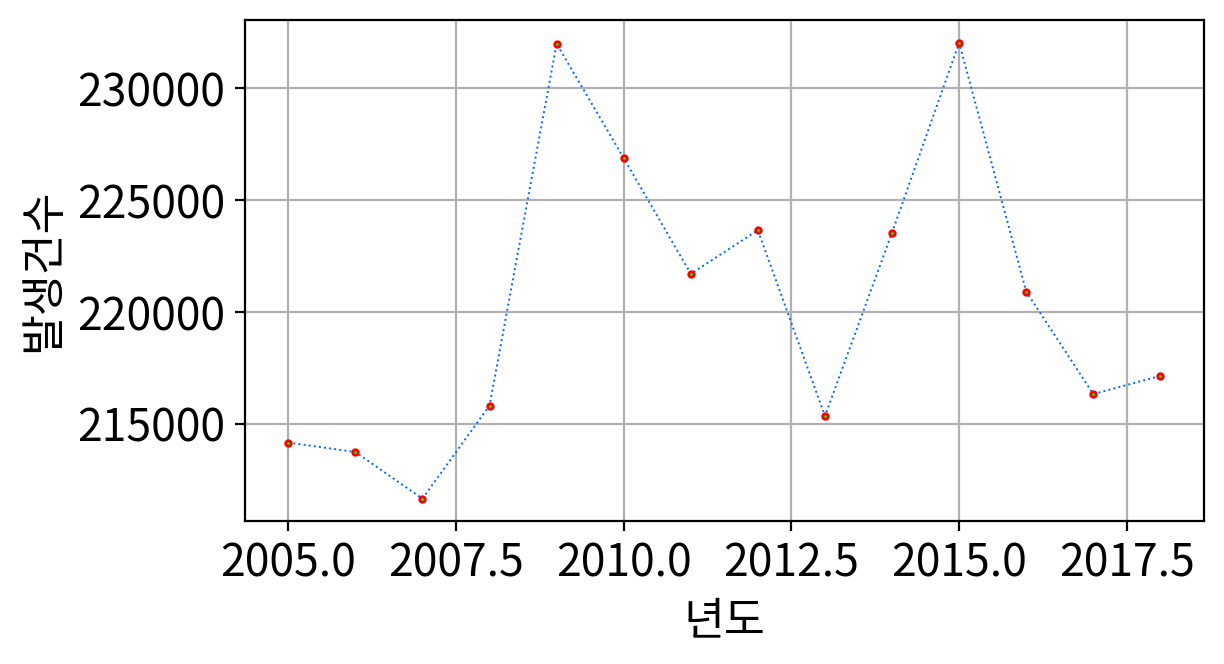

In [9]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기 (w/ seaborn 사용)

# 2-1) Boxplot
#sb.boxplot(data = df['발생자수'], orient = 'v')
#sb.boxplot(data = df['부상자수'], orient = 'v')
#sb.boxplot(data = df[['발생자수', '부상자수']], orient = 'v') # if 필터링

# 2-2) Lineplot
sb.lineplot(
            #df['발생건수'],                     방법 1
            #x=df.index, y = df['발생건수'],     방법 2
            data = df, x = df.index, y = '발생건수', # 방법 3 (이 줄만 있어도됨)
            color = "#0066ff", linewidth = 0.7, linestyle = ':', 
            marker = 'o', markersize = 2,
            markerfacecolor = "#00ff00", 
            markeredgecolor = "#ff0000", markeredgewidth = 1)


# 3) 그래프 꾸미기: 
#ax.set_title("✅", color = '✅', pad = 8, fontsize = 12)
#ax.set_xlabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_ylabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_xlim([✅, ✅])       # x축 범위
#ax.set_ylim([✅, ✅])       # y축 범위
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
#plt.savefig('plot.png', dpi = my_dpi * 2)   # 이미지파일 저장                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

## #03. 다중그래프 (a.k.a.안쓸건 지우기)
line, box, KDE, hist 다 과정 같음!

### in lineplot
- 방법1) 선 마다 직접 나열:

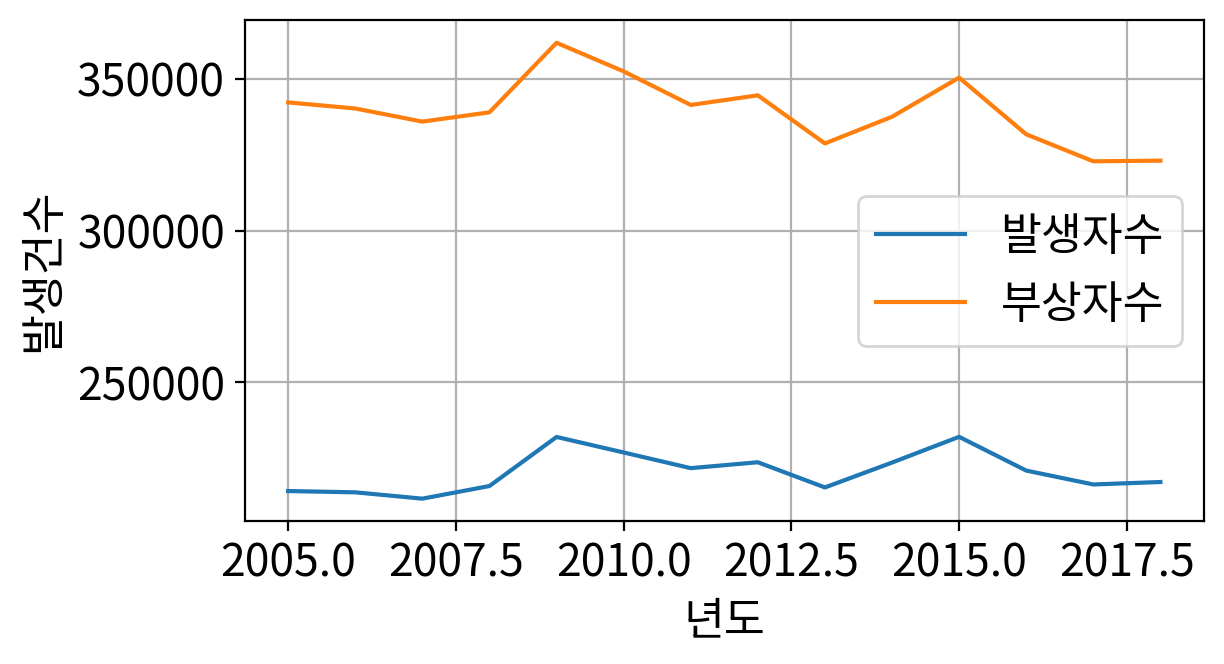

In [ ]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
# -> ex) Lineplot
sb.lineplot(data = df, x = df.index, y = '발생건수', label = '발생자수')
sb.lineplot(data = df, x = df.index, y = '부상자수', label = '부상자수')

# 3) 그래프 꾸미기: 
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
#plt.savefig('plot.png', dpi = my_dpi * 2)   # 이미지파일 저장                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

- 방법2) melt 함수 사용 시: ↓↓
## #04. hue 파라미터 이해하기

### 1. 데이터 전처리 (melt)

melt를 적용할 경우 index 해제 필요

In [12]:
df1 = df.reset_index()
df1

,년도,발생건수,사망자수,부상자수
0,2005,214171,6376,342233
1,2006,213745,6327,340229
2,2007,211662,6166,335906
3,2008,215822,5870,338962
4,2009,231990,5838,361875
5,2010,226878,5505,352458
6,2011,221711,5229,341391
7,2012,223656,5392,344565
8,2013,215354,5092,328711
9,2014,223552,4762,337497


In [13]:
df2 = df1.melt(id_vars='년도', value_vars=['발생건수', '사망자수', '부상자수'],
               var_name='구분')
df2
# id_vars='년도' -> variables column으로 생성되고, 
# 해당 데이터는 카테고리 타입으로 될거임

,년도,구분,value
0,2005,발생건수,214171
1,2006,발생건수,213745
2,2007,발생건수,211662
3,2008,발생건수,215822
4,2009,발생건수,231990
5,2010,발생건수,226878
6,2011,발생건수,221711
7,2012,발생건수,223656
8,2013,발생건수,215354
9,2014,발생건수,223552


### 2. hue 파라미터를 이용한 시각화하기

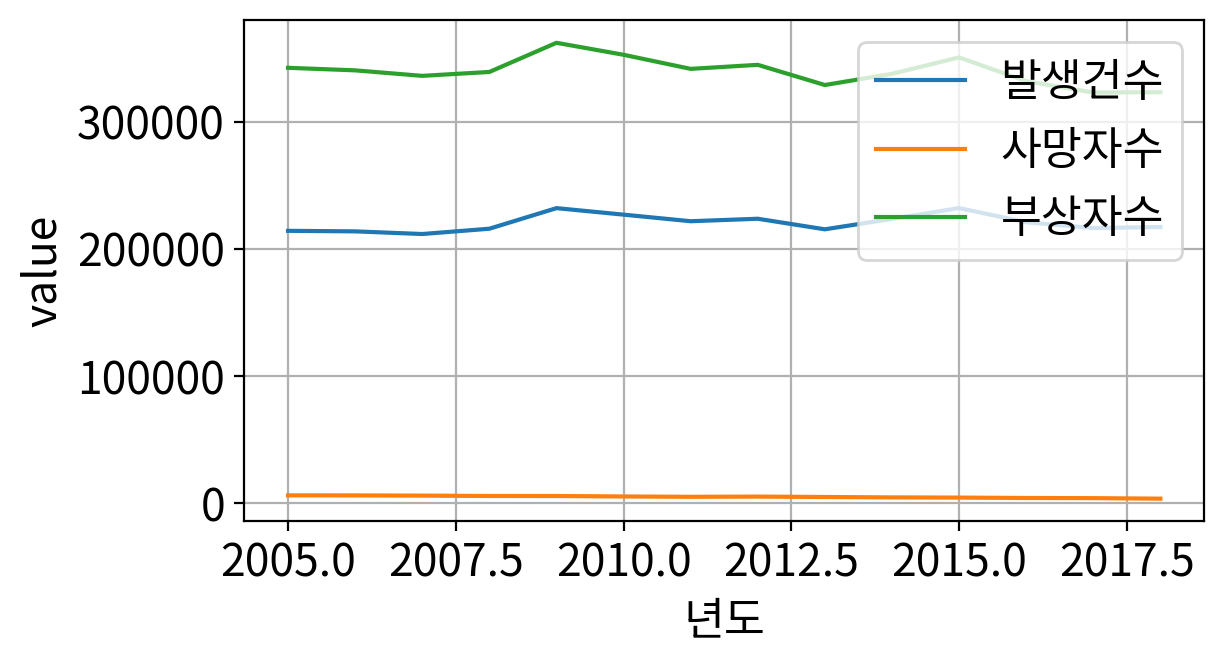

In [15]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
# -> ex) Lineplot
sb.lineplot(data = df2, hue = '구분', x = '년도', y = 'value')

# 3) 그래프 꾸미기: 
ax.grid(True)                # 배경, 격자 표시/숨김
ax.legend(loc = 'upper right')

# 4) 출력
#plt.savefig('plot.png', dpi = my_dpi * 2)   # 이미지파일 저장                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료